# 5¬™ Etapa Conclu√≠da

### Regress√£o logistica e explora√ß√£o de caracteristicas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
mpl.rcParams['figure.dpi'] = 400

In [2]:
df = pd.read_csv('Capitulo_1_arquivo_limpo.csv')

In [3]:
features_response = df.columns.tolist()

In [4]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [5]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [6]:
# removendo itens que n√£o utilizaremos da variavel features_response
excl_itens = ['ID', 'SEX', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
             'EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [8]:
# criando uma list comprehension  para remover os itens
features_response = [item for item in features_response if item not in excl_itens]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

## Correla√ß√£o de Pearson ou Correla√ß√£o Linear

In [9]:
# criando uma nova vari√°vel
corr = df[features_response].corr()
corr.iloc[0:5, 0:5]

LIMIT_BAL  EDUCATION  MARRIAGE       AGE     PAY_1
LIMIT_BAL   1.000000  -0.232688 -0.111873  0.149157 -0.273396
EDUCATION  -0.232688   1.000000 -0.137097  0.179035  0.112653
MARRIAGE   -0.111873  -0.137097  1.000000 -0.412828  0.019759
AGE         0.149157   0.179035 -0.412828  1.000000 -0.044277
PAY_1      -0.273396   0.112653  0.019759 -0.044277  1.000000

### Plotando a matriz de correla√ß√£o usando o Seaborn

<AxesSubplot:>

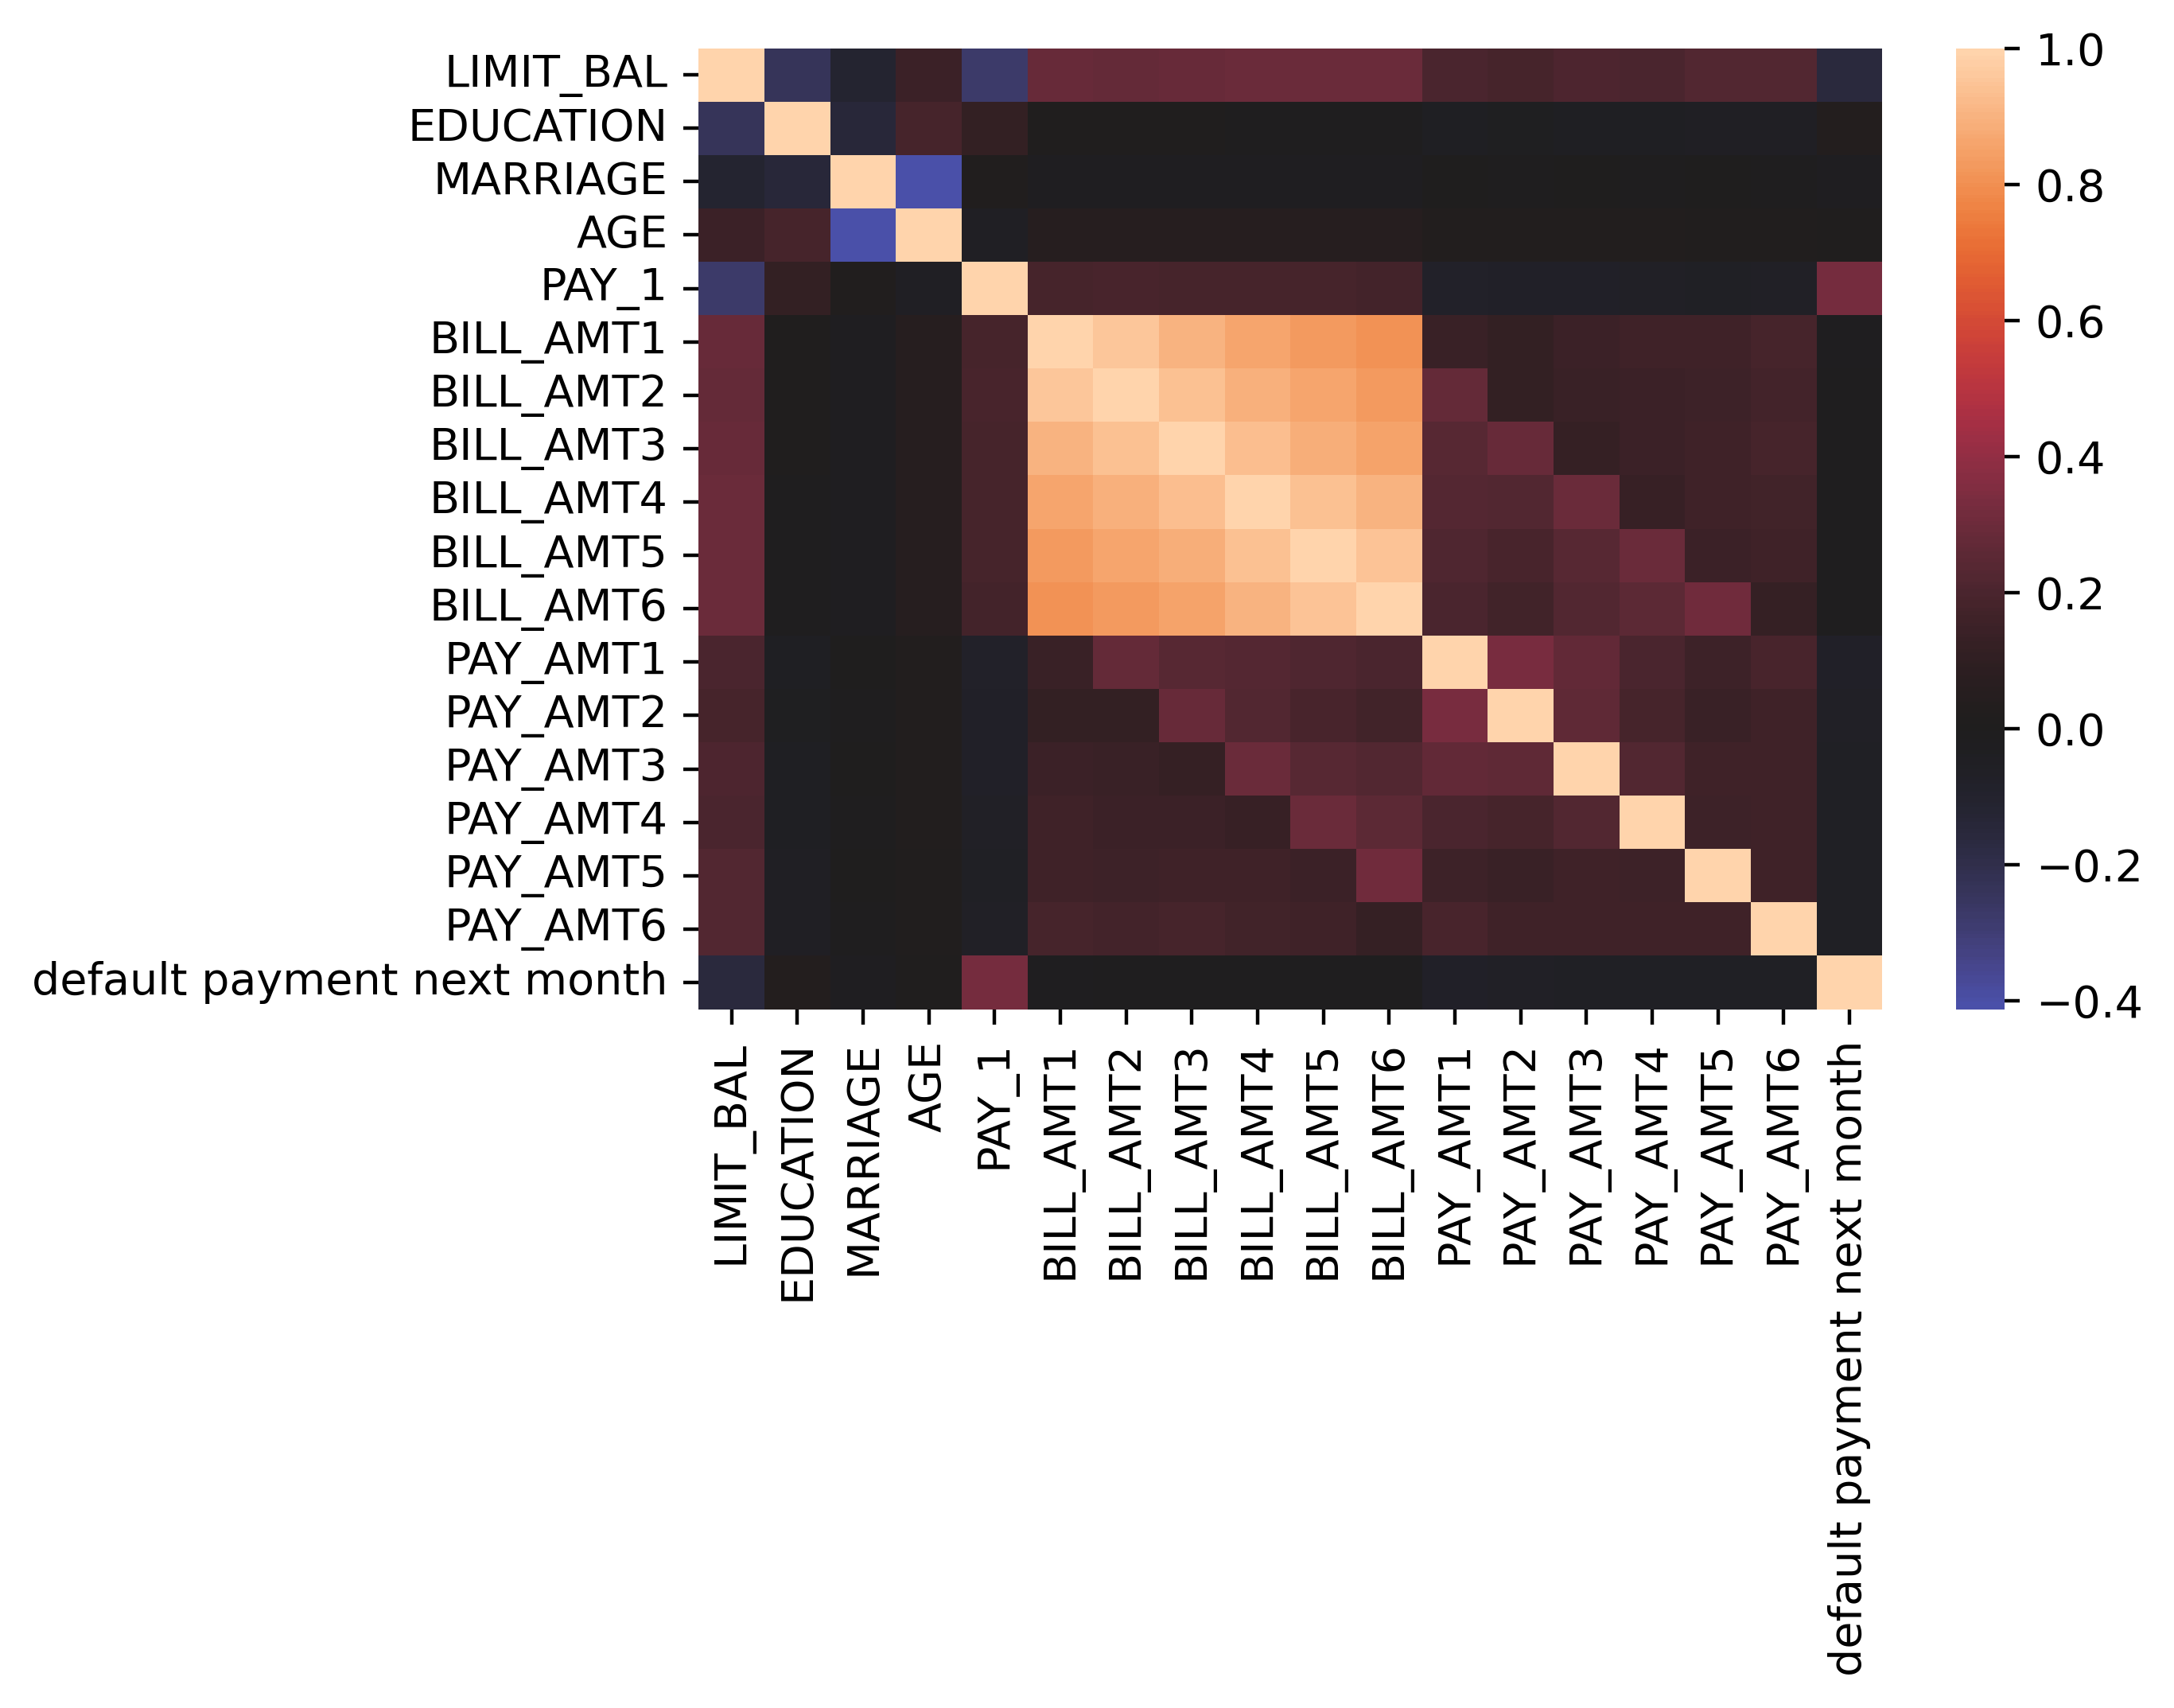

In [10]:
sns.heatmap(corr,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,
           center=0)

### O heatmap do seaborn cria uma visualiza√ß√£o clara da matriz de correla√ß√£o, de acordo com a escala de cor que aparece √† direita na figura acima, chamada de barra de cores. Os 'ticklabels' aqui nada mais s√£o do que os eixos x e y que s√£o as caracteristicas e o nome da resposta, al√©m disso indicamos o centro da barra de cores deve ser 0 para que as corerela√ß√µes positivas e negativas sejam distingu√≠veis como vermelha e azul respectivamente. 

### Em um n√≠vel geral, se duas caracteristicas ou uma caracteristica e a resposta estiverem altamente relacionadas, podemos dizer que h√° uma forte associa√ß√£o entre elas. Ou seja; as caracteristicas correlacionadas com a resposta ser√£o √∫teis na previs√£o. essa alta correl√ß√£o pode ser positiva ou negativa.

## Sele√ß√£o de caracteristicas Univariadaüëá

### Executando teste F ANOVA (an√°lise de vari√¢ncia)

In [11]:
# verificando o n√∫mero de  caracteristicas e arrays
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [12]:
# importando a fun√ß√£o f_classif para fornecer caracteristicas e respostas
from sklearn.feature_selection import f_classif
[f_stat, f_p_value] = f_classif(X, y)

In [13]:
#Criando um dataframe com nomes das caracteristicas com a estatistica F e com os valores -p e classificado pelo valor -p
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                         'F statistic':f_stat,
                         'p value':f_p_value})
f_test_df.sort_values('p value')

Feature  F statistic        p value
4       PAY_1  3156.672300   0.000000e+00
0   LIMIT_BAL   651.324071  5.838366e-142
11   PAY_AMT1   140.612679   2.358354e-32
12   PAY_AMT2   101.408321   8.256124e-24
13   PAY_AMT3    90.023873   2.542641e-21
15   PAY_AMT5    85.843295   2.090120e-20
16   PAY_AMT6    80.420784   3.219565e-19
14   PAY_AMT4    79.640021   4.774112e-19
1   EDUCATION    32.637768   1.122175e-08
2    MARRIAGE    18.078027   2.127555e-05
5   BILL_AMT1    11.218406   8.110226e-04
7   BILL_AMT3     5.722938   1.675157e-02
6   BILL_AMT2     5.668454   1.727965e-02
3         AGE     5.479140   1.925206e-02
8   BILL_AMT4     3.434740   6.384965e-02
9   BILL_AMT5     1.216082   2.701409e-01
10  BILL_AMT6     1.049561   3.056176e-01

### No scikit-learn, um dos usos para avalia√ß√µes como o teste f, √© na execu√ß√£o da sele√ß√£o de caracteristicas univariada. Isso pode ser benefico se voc√™ tiver um n√∫mer muito grande de carcateristicas, varias talvez totalmente inuteis, e quiser uma forma r√°pida de obter uma "lista curta" com ad mais √∫teis.

In [14]:
# vamos selecionar as caracteristicas consideradas pelo teste F como as 20% melhores
from sklearn.feature_selection import SelectPercentile
selector = SelectPercentile(f_classif, percentile=20)

In [15]:
selector.fit(X,y)

SelectPercentile(percentile=20)

In [16]:
# capturando os indices das caracteristicas selecionadas em um array
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [17]:
# obtendo todos os nomes das carateristicas com excess√£o da vari√°vel de resposta
features = features_response[:-1]

In [18]:
best_features = [features[counter] for counter in range(len(features))
                if best_feature_ix[counter]]
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']

#### Quando usamos um teste F para examinar a diferen√ßa de media somente entre dois grupos, como fizemos aqui para o problema d classifica√ßao binaria do estudo de caso, na verdade o teste se resume ao que e conhecido como teste t. Um teste F √© extensivel a 3 ou mais grupos e, portanto, e util para a clasifica√ßao multiclasse.

# Visualizando o relacionamento entre as carateristicas e a resposta

In [19]:
# Calculando a linha de base da variavel de resposta para a taxa de inadimpl√™ncia de todo o dataset usando o m√©todo mean() do pandas
overall_default_rate = df['default payment next month'].mean()
overall_default_rate

0.2217971797179718

In [20]:
# criando um agrega√ß√£o groupby/mean de PAY1
group_pay_mean_y = df.groupby('PAY_1').agg({'default payment next month':np.mean})
group_pay_mean_y

default payment next month
PAY_1                            
-2                       0.131664
-1                       0.170002
 0                       0.128295
 1                       0.336400
 2                       0.694701
 3                       0.773973
 4                       0.682540
 5                       0.434783
 6                       0.545455
 7                       0.777778
 8                       0.588235

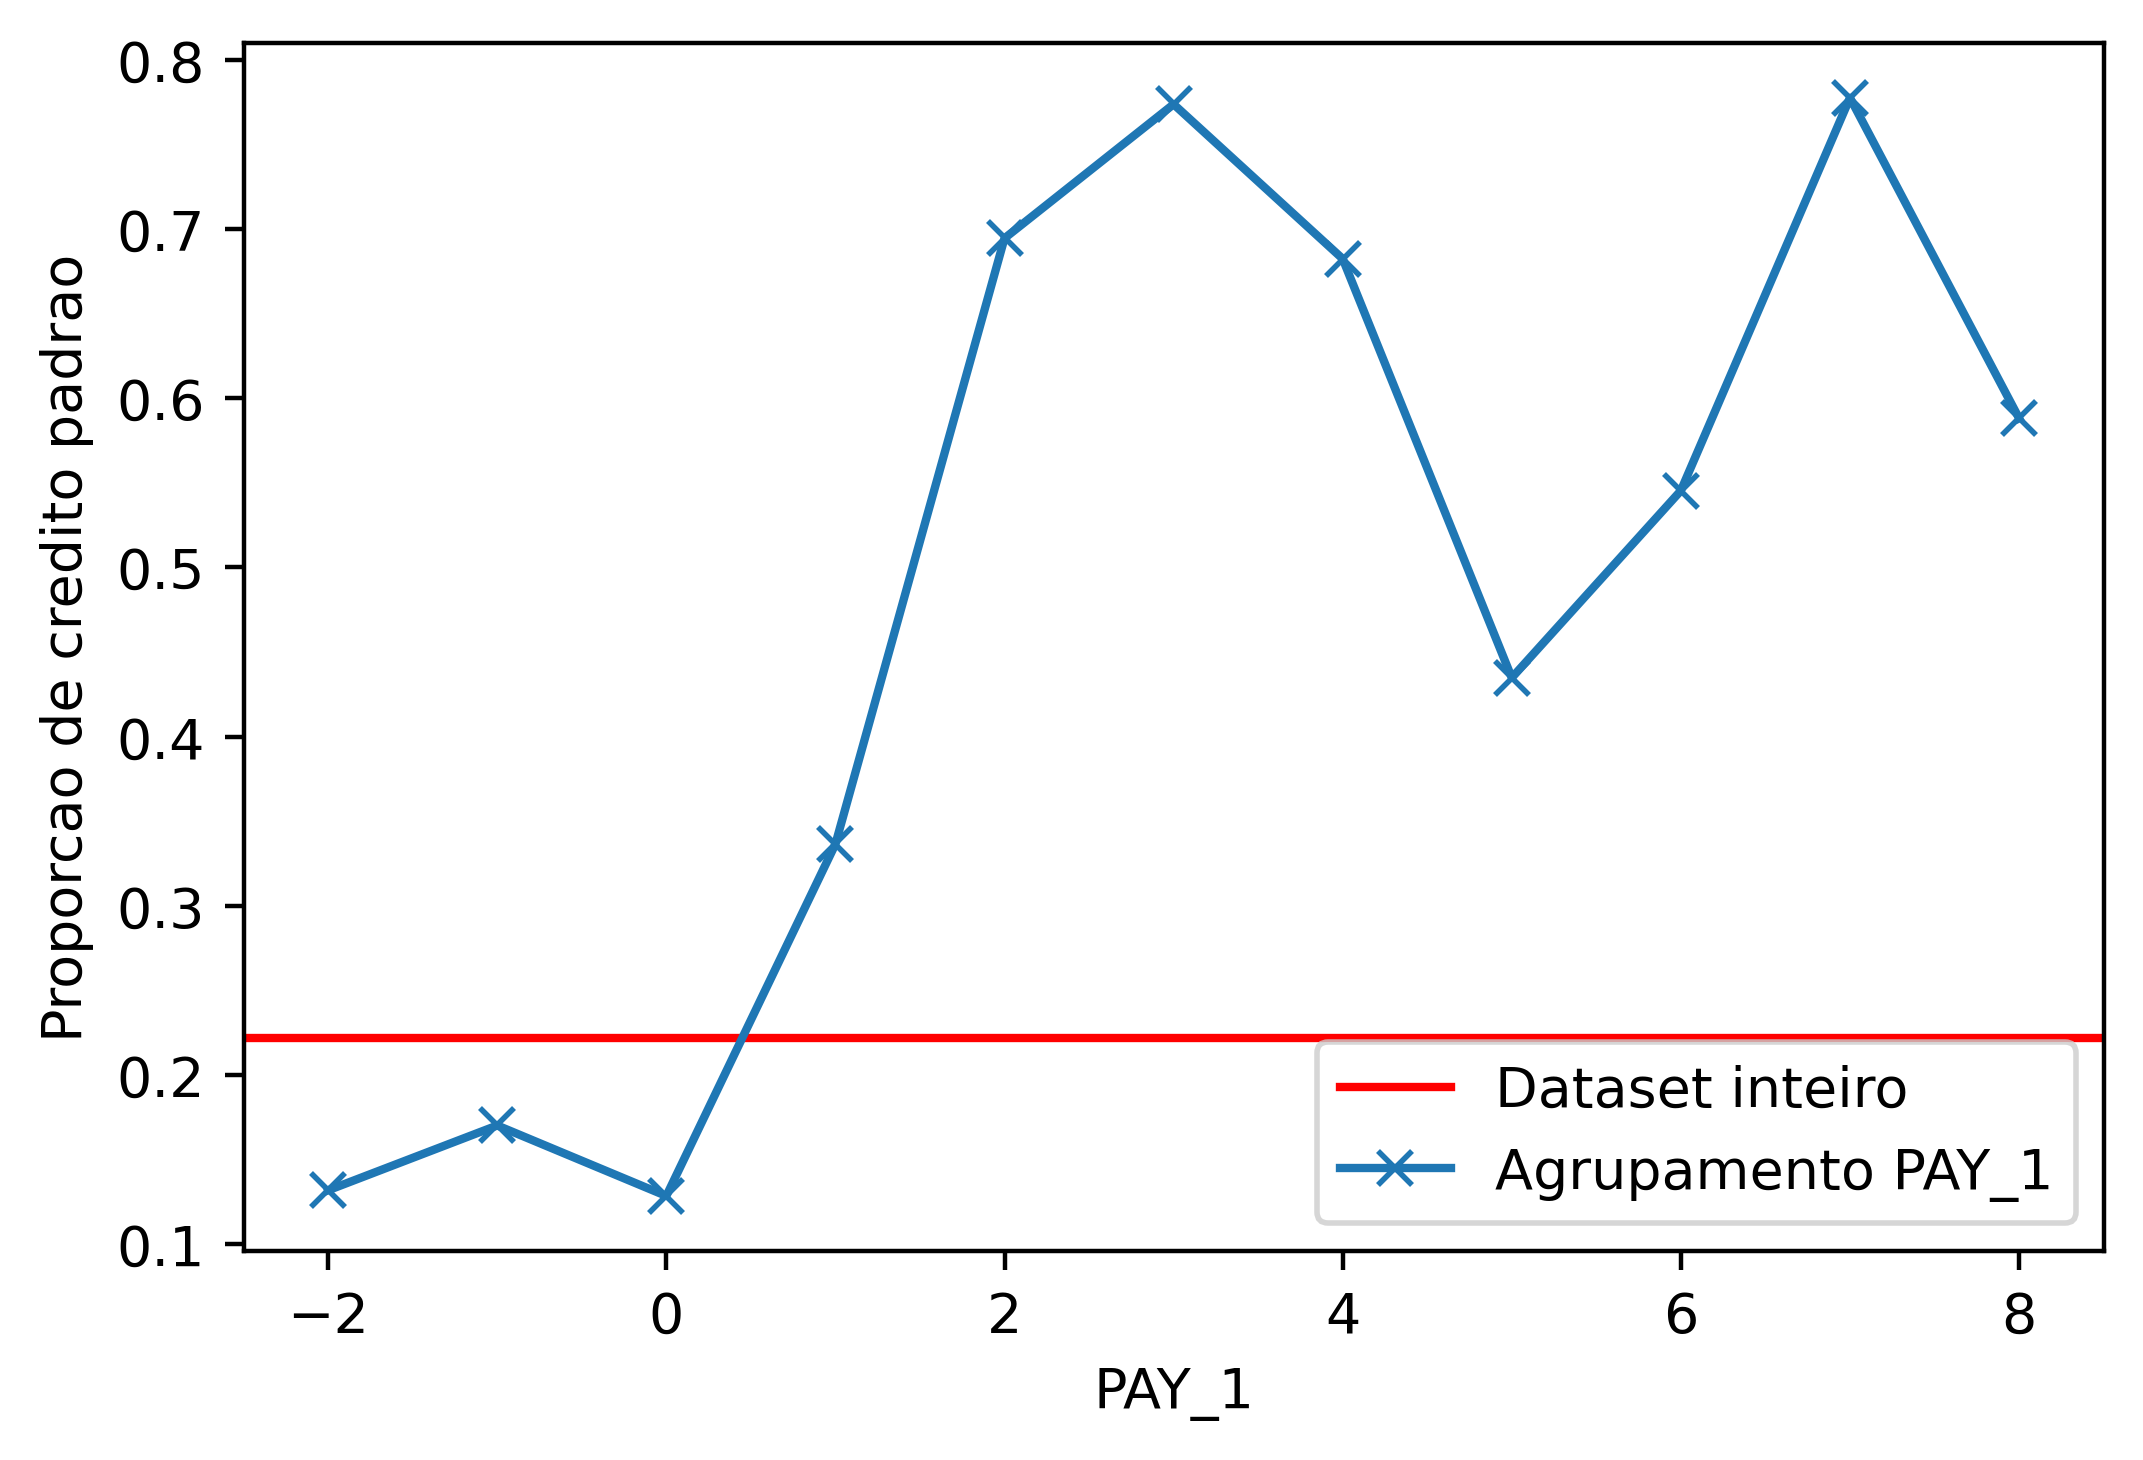

In [21]:
axes = plt.axes()
axes.axhline(overall_default_rate, color='red')
group_pay_mean_y.plot(marker='x', legend=False, ax=axes)
axes.set_ylabel('Proporcao de credito padrao')
axes.legend(['Dataset inteiro', 'Agrupamento PAY_1'])

#### A visualiza√ß√£o √© clara: quem j√° inadimpliu apresenta tendencia maior de faz√™-lo novamente. A taxa de inadimpl√™ncia  de contas em boa situa√ß√£o est√° bem abaixo da taxa geral, que sabemos que era de aproximadamente 22%. Essa √© uma boa referencia visual para apresentarmos ao s√≥cio da empresa j√° que mostra o efeito da caracteristica que talvez seja a mais importante do nosso modelo.

#### Agora criaremos mascaras logicas para amostras positivas e negativasüëá

In [22]:
# Criando mascaras logicas
pos_mask = y == 1
neg_mask = y == 0

Text(0.5, 1.0, 'Limite de Credito pela variavel de resposta')

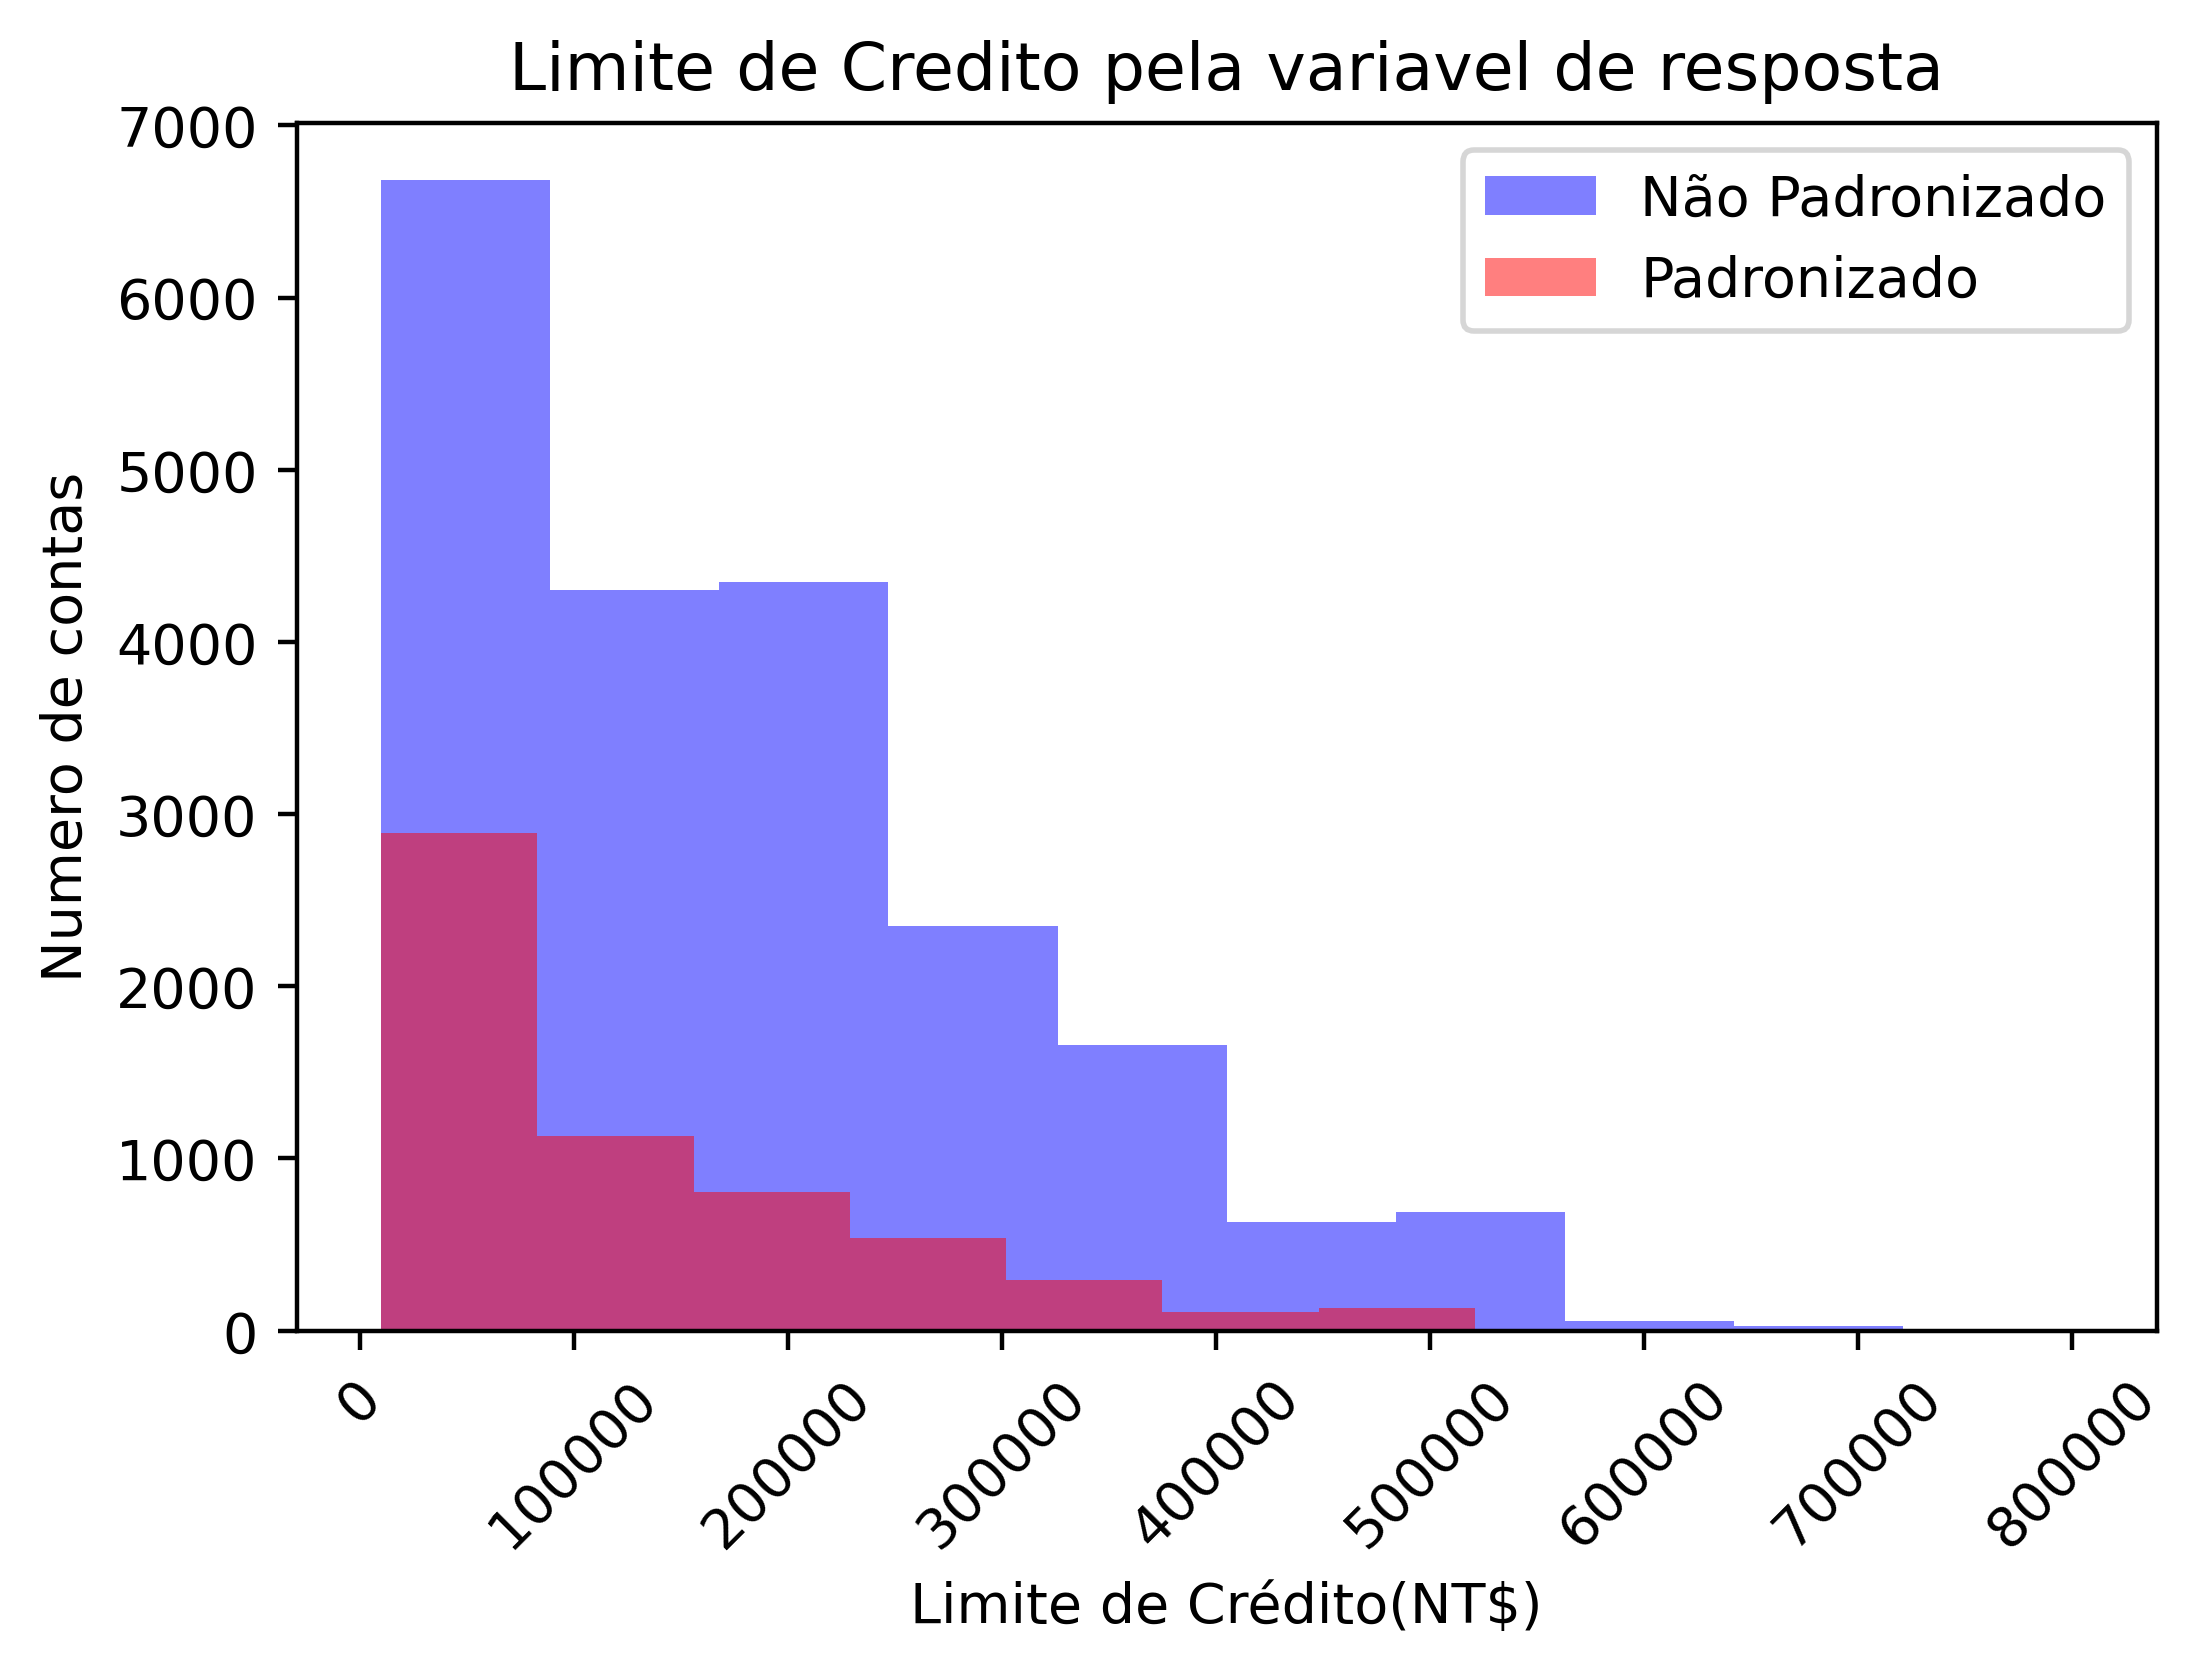

In [24]:
# criando plotagem de histograma dupla com as propriedades mencionadas
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], alpha=0.5, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], alpha=0.5, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Limite de Cr√©dito(NT$)')
axes.set_ylabel('Numero de contas')
axes.legend(['N√£o Padronizado', 'Padronizado'])
axes.set_title('Limite de Credito pela variavel de resposta')

##### Embora a plotagem acima tenha ficado com a formata√ß√£o desejada, ela n√£o √© t√£o explicativa como poderia. Quer√≠amos olhar para ela e constatar que o limite de cr√©dito pode ser uma boa maneira de diferenciar as contas inadimplentes das que n√£o inadimplir√£o. No entanto, nosa principal percep√ß√£o visual √© a de que o histograma verde √© maior so que o vermelho. Isso ocorre porque h√° menos contas inadimplentes.

##### Seria mais informativo exibir algo sobre como as formas desses histogramas s√£o diferentes, e n√£o apenas seus tamanhos. Para isso criaremos a vers√£o empirica de uma fun√ß√£o de densidade de probabilidade. Isso significa que a integral, ou a area contida dentro de cada histograma ser√° igual a1 ap√≥s a normaliza√ßao, ja que  as probabilidades resultam em 1.

In [25]:
#criando um histograma com 16 bins
bin_edge = list(range(0,850000,50000))
print(bin_edge[-1])

800000


C:\Users\gil26\AppData\Local\Temp/ipykernel_7592/971691656.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels(np.round(y_ticks*50000,2))


Text(0.5, 1.0, 'Distribuicao normal dos limites de credito pela variavel de resposta')

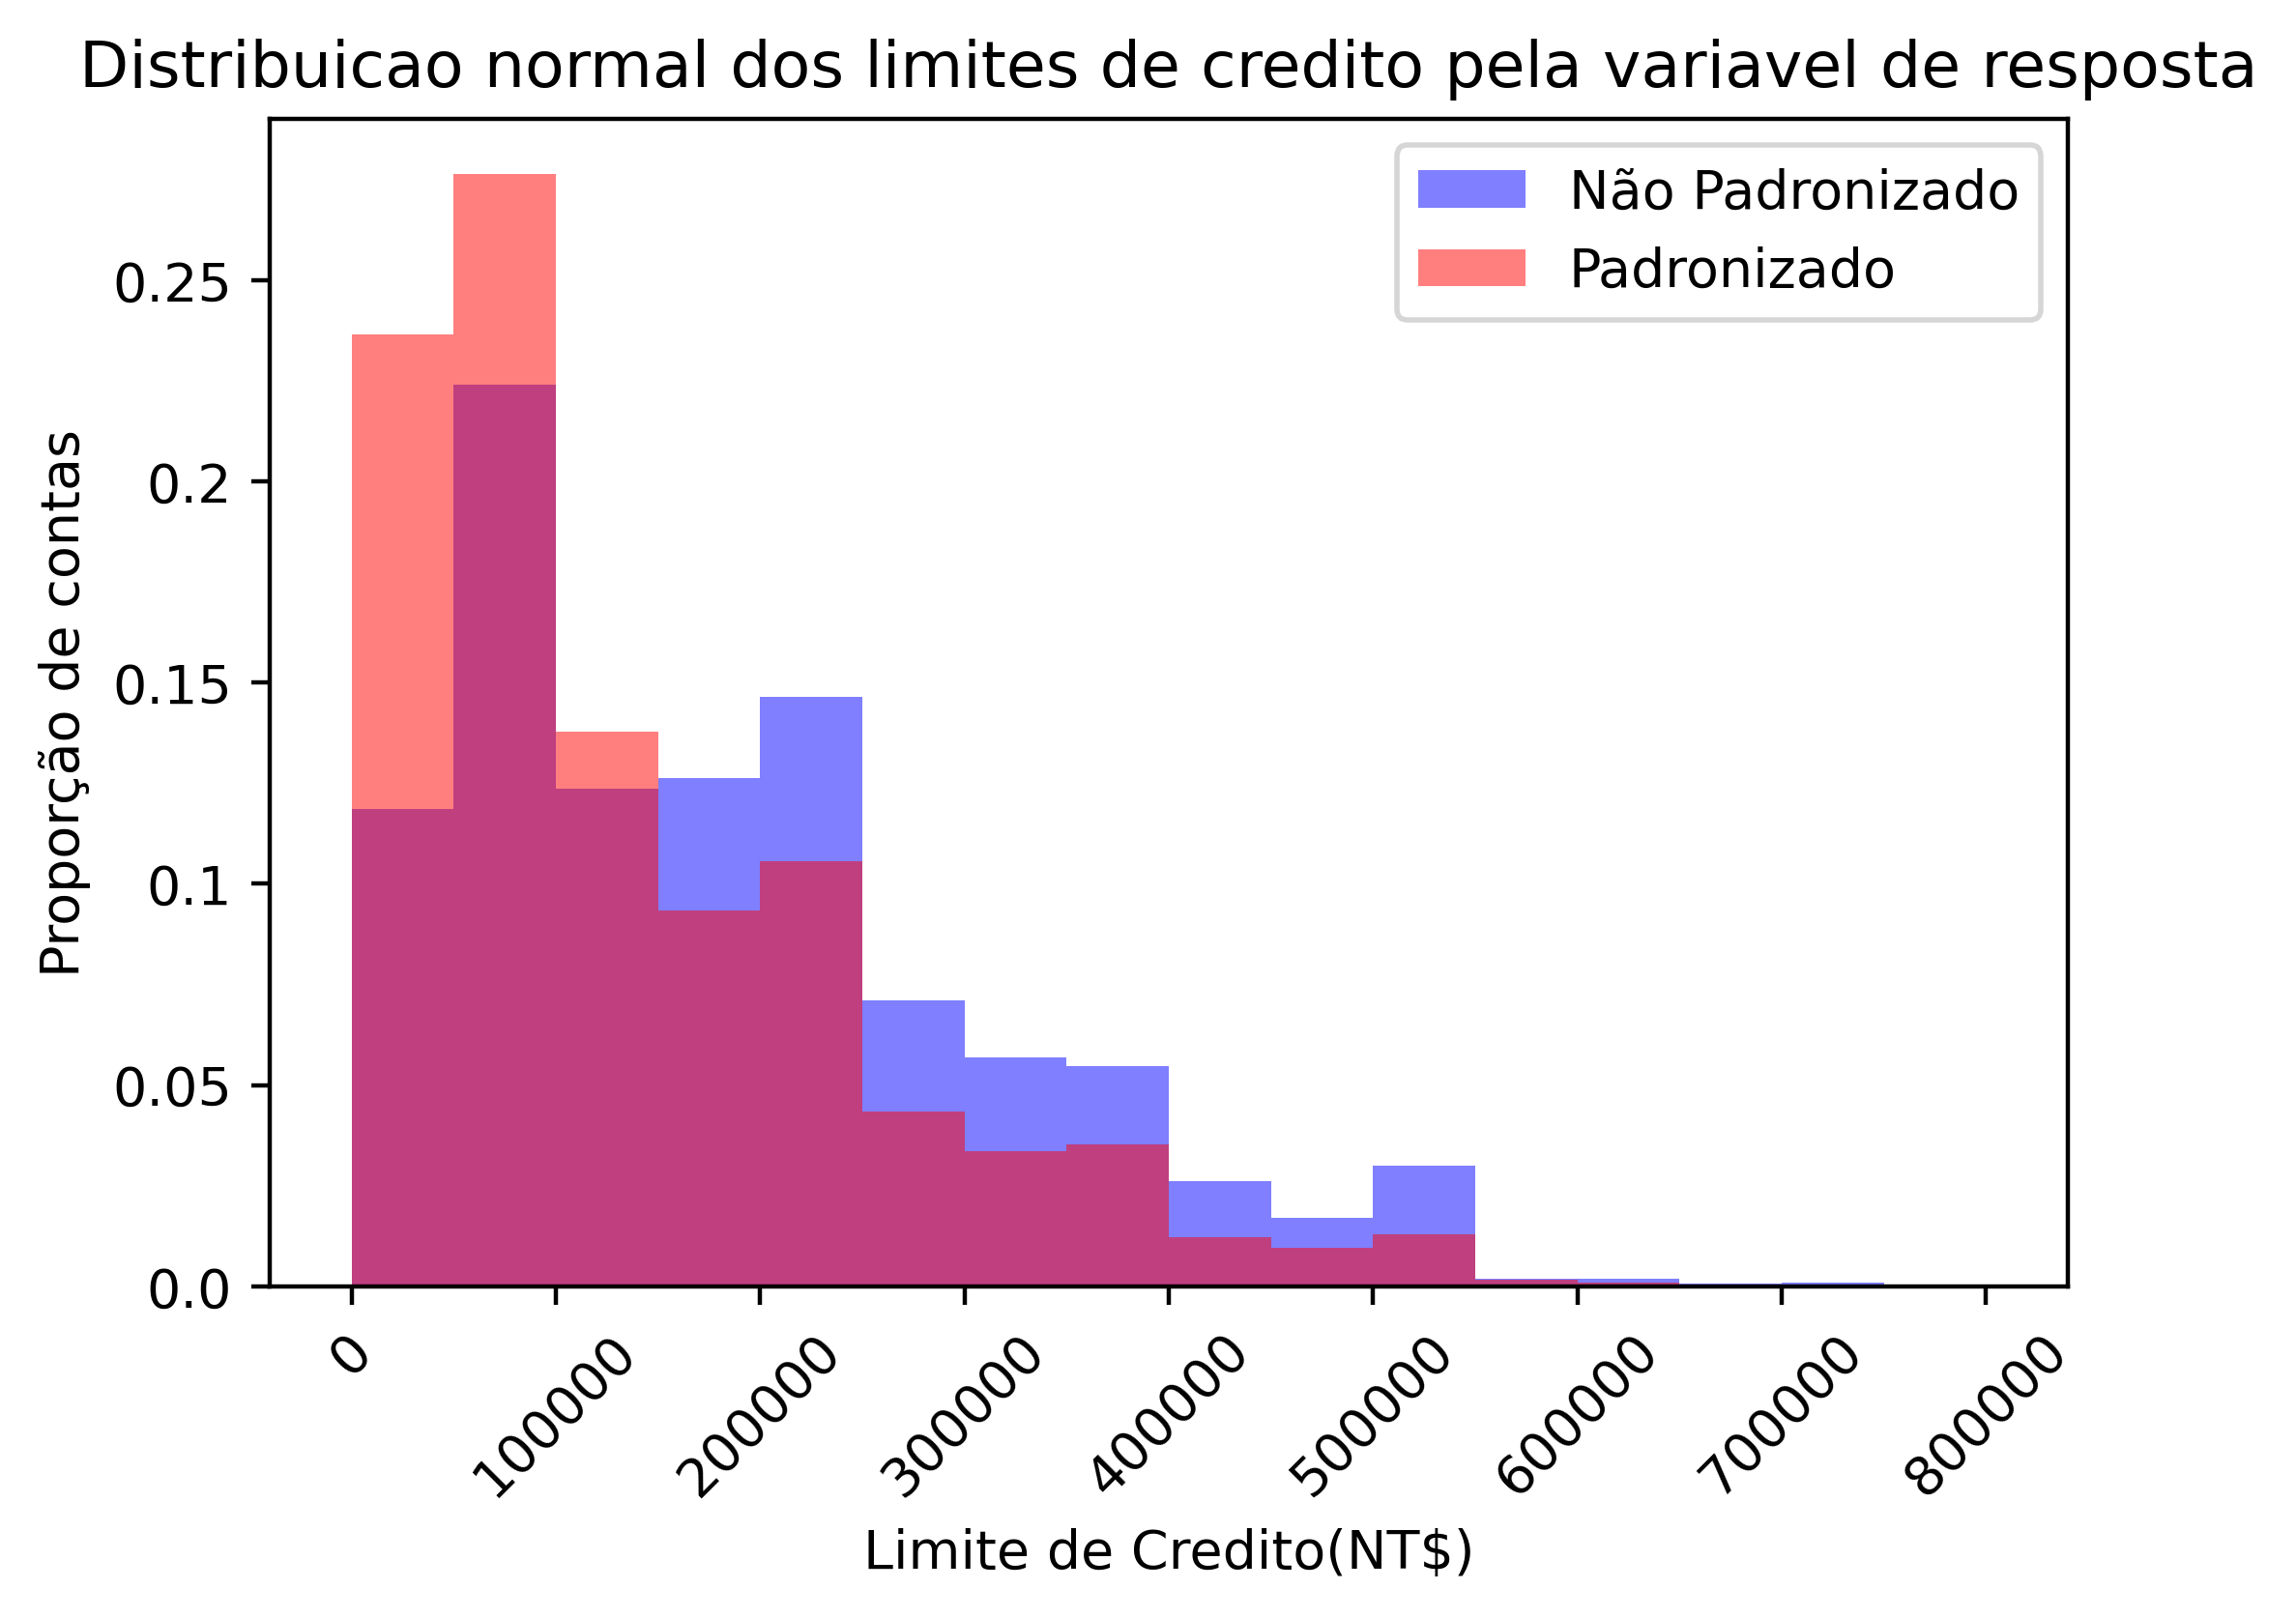

In [26]:
mpl.rcParams['figure.dpi'] = 400
axes = plt.axes()
axes.hist(df.loc[neg_mask, 'LIMIT_BAL'], bins=bin_edge,
         alpha=0.5, density=True, color='blue')
axes.hist(df.loc[pos_mask, 'LIMIT_BAL'], bins=bin_edge,
         alpha=0.5, density=True, color='red')
axes.tick_params(axis='x', labelrotation=45)
axes.set_xlabel('Limite de Credito(NT$)')
axes.set_ylabel('Propor√ß√£o de contas')
y_ticks = axes.get_yticks()
axes.set_yticklabels(np.round(y_ticks*50000,2))
axes.legend(['N√£o Padronizado', 'Padronizado'])
axes.set_title('Distribuicao normal dos limites de credito pela variavel de resposta')

#### O que podemos extrair dessa plotagem?

#### Parece que as contas inadimplentes tendem a ter uma propor√ß√£o maior de limites de credito menores. Nossa hipotese era de que o cliente daria limites menores a contas que apresentassem maior risco.

#### A comunica√ß√£o visual de conceitos quantitativos √© uma habilidade-chave da ciencia de dados

# Fim...por enquanto...